# Tutorial: Image Segmentation of Aerial Imagery
### *GRAD-E1394 Deep Learning -- Assignment 3*

Authors:
*   Gabriel da Silva Zech, [g.dasilvazech@students.hertie-school.org](g.dasilvazech@students.hertie-school.org)
*   Julian Kath, [j.kath@students.hertie-school.org](j.kath@students.hertie-school.org)
*   Krishnamoorthy Manohara, [k.manohara@students.hertie-school.org](k.manohara@students.hertie-school.org)
*   Florian Winkler, [f.winkler@students.hertie-school.org](f.winkler@students.hertie-school.org)
*   Nassim Zoueini, [n.zoueini@students.hertie-school.org](n.zoueini@students.hertie-school.org)

This tutorial provides an end-to-end workflow of image segmentation based on aerial images. It introduces a U-net convolutional neural network approach to segmenting buildings from aerial imagery as a specific application of deep learning in a public policy context. Built in a PyTorch environment, the tutorial provides users step-by-step explanations of image segmentation and an example of reproducible, working code in a self-contained notebook. Users will benefit from a structured and practical overview of how to collect and pre-process aerial image data, how to create a custom dataset that annotates aerial images using building footprints, and how to train and fine-tune an image segmentation model on aerial imagery. The tutorial can be extended to further projects that involve a similar approach to aerial or satellite image segmentation, such as segmenting roads or crop fields.

# Table of Contents


*   [Memo](#memo)
*   [Overview](#overview)
*   [Background & Prerequisites](#background-and-prereqs)
*   [Software Requirements](#software-requirements)
*   [Data Description](#data-description)
*   [Model Training and Testing](#modeltraintest)
*   [Results & Discussion](#results-and-discussion)
*   [References](#references)


# General Guidelines
*(Please remove this and other guideline sections from your final tutorial submission.)*

This template should help you create your tutorial. You may introduce modifications and extensions but adhere to the general principles for writing the tutorial:

*   Be brief. 
    *  Keep it short and simple. Avoid unnecessary complexity.
*   Clearly illustrate how the content relates to public policy. 
    *  Identify the ways in which this tutorial would help the users (your collegues) in their work.
*   Provide enough context.
    *  Explain important concepts directly in the tutorial notebook, but feel free to direct users to external resources when necessary.  
*   Avoid or minimize the use of jargon. 
    *  Ideally, the content can be understood by both an ML audience and by people who are relatively new to ML and deep learning.
*   Focus on readability and usability. 
    *  Interleave code cells with explanatory text, keeping your audience in mind.
*   Follow guidelines to avoid plagiarism. 
    * Any verbatim text needs to be put in quotation marks. 
    * Do not copy code.
    * Clearly reference ideas and work of others.
    * [Hertie School Code of Conduct](https://hertieschool-f4e6.kxcdn.com/fileadmin/5_WhoWeAre/Code_of_Conduct.pdf)
* Ensure reproducibility.
    * Ensure that your notebook can be rerun by somebody else on a different machine in a reasonable amount of time. If the task is computationally expensive, provide an additional, smaller data sample for fast reproduction, and use that in your tutorial. 

## Additional Instructions
We highly recommend that you follow the [Ten simple rules for writing and sharing computational analyses using Jupyter Notebooks](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007007). We summarize the ten rules as follows:

<center><img src="https://journals.plos.org/ploscompbiol/article/figure/image?size=large&id=info:doi/10.1371/journal.pcbi.1007007.g001" width=400>

<small>Rule, Adam, et al. "Ten simple rules for writing and sharing computational analyses in Jupyter Notebooks." PLoS computational biology 15.7 (2019).</small></center>

### Rule 1: Tell a story for an audience
* Interleave explanatory text and code to tell a compelling story.
* Describe not just what you did but why you did it.
* How you tell your story depends on your goal and your audience.

### Rule 2: Document the process, not just the results
* Document relevant interactive explorations.
* Don't wait until the end to add explanatory text.
* Generate publication-ready version of figures from the get-go.

### Rule 3: Use cell divisions to make steps clear
* Each cell should perform one meaningful step in the analysis.
* Think one cell = one paragraph, function, or task (e.g. creating a plot).
* Avoid long cells (50+ lines) 
* Organize your notebook into sections/subsections.  

### Rule 4: Modularize code
* Avoid duplicate code (no copy-pasting!)
* Wrap the code that you want to reuse in a function.
* Use descriptive and meaningful variable and function names.

### Rule 5: Record dependencies
* Manage your dependencies using a package or environment manager (e.g. pip,conda)
* Feel free to use tools like Binder or Docker to generate a "container" for better reproducibility. 

### Rule 6: Use version control
- Google colab allows you to view revision history.
- You can also opt to use Git and Github for version control.
- As Jupyter uses JSON for serialization, tracking raw changes on GitHub is difficult. [ReviewNB](https://www.reviewnb.com/) and [nbdime](https://github.com/jupyter/nbdime) can help to generate human-readable diffs.

### Rule 7: Build a pipeline
* A well-designed notebook can be generalized into a pipeline.
* Place key variable declarations at the top/beginning of the notebook.
* Make a habit of regularly restarting your kernel and rerunning all cells.
* Before submitting, reinstall all dependencies and rerun all cells in a new enviroment to ensure reproducibility.

### Rule 8: Share and explain your data
* Properly reference the data you use. 
* If using your own data, make your data or a sample of your data publicly available along with the notebook.
* You can opt to host public copies of your data.

### Rule 9: Design your notebooks to be read, run, and explored
* Read: For code hosted in a public repository, add README and LICENSE files.
* Run: Consider using Google Colab, Binder, or Docker for seamless replication.
* Explore: Consider how you can design your notebook so future users can built on top of your work.

### Rule 10: Advocate for open research

<a name="memo"></a>
# Memo

*Write a memo for the leadership explaining in layman's terms why this topic is relevant for public policy. Discuss relevant research works, real-world examples of successful applications, and organizations and governments that apply such approaches for policy making.*




**Image segmentation** is a digital image processing method which divides an image into similar segments by assigning labels to each pixel in an image. A prime application of computer vision that uses deep learning, image segmentation leverages artificial intelligence (AI) to identify objects in a large number of images, localize their boundaries, and delineate areas for further processing. 

While image segmentation has traditionally been used in medical imaging, agriculture and self-driving vehicles, segmentation of satellite and aerial images bears tremendous potential for applications in public policy. Computer vision adds significant value in both the speed and accuracy of insights from high-resolution imagery from space where the human eye is unable to detect relevant information. Image segmentation helps governments operate more efficiently by automating detection, localization, measurement and monitoring activities from space.

In the **energy and infrastructure** domain, the segmentation of buildings from satellite and aerial images can be used by governments and energy providers to forecast energy supply, e.g. by measuring [rooftops' solar power potential](https://sunroof.withgoogle.com/#/p=0). In addition, image segmentation helps authorities monitor critical infrastructure, such as [power lines](https://www.mdpi.com/2072-4292/11/11/1342) or [railways](https://ieeexplore.ieee.org/abstract/document/9491736), from space in real time. For example, a collaboration between space startup LiveEO and Deutsche Bahn leverages image segmentation for near-real time [vegetation management](https://www.deutschebahn.com/en/Digitalization/startups/db_startups/LiveEO-6935360) along railway tracks in Germany.

In **smart cities**, local governments can use image segmentation of roads, vehicles and pedestrians for trafic control systems, pedestrian detection and video surveillance. Moreover, image segmentation allows **urban planners** to analyse the use of land cover for planning purposes, e.g. distinguishing agricultural land and residential areas in large areas for further processing.

Supporting **environmental protection**, image segmentation also enables governments to monitor environmental changes from space, e.g. by [measuring deforestation](https://www.bu.edu/articles/2016/satellite-maps-deforestation/) or desertification. Finally, satellite and aerial image segmentation can provide crucial help to authorities in **disaster response**, such as wildfires, [floods](https://www.hotosm.org/updates/2017-03-15_imagery_released_for_cyclone_enawo_to_support_mapping_activities) or landslides, e.g. by measuring and monitoring impacted areas.




<a name="overview"></a>
# Overview

*In this section, provide a summary of the main contributions of the tutorial notebook. Note that the tutorial should introduce or demonstrate the use of a method, dataset, tool, or technology to address a problem related to public policy. Be clear on the goal of the tutorial and the expected learning outcomes for the users.*

Applying segmentation to aerial images from the region of North Rhine-Westphalia (NRW) in Germany, this tutorial showcases the use of image segmentation as a powerful method of deep learning to segment buildings from aerial imagery. This tutorial walks through every step of a real-world image segmentation project, covering tasks from data collection, data pre-processing and image annotation, model training and testing as well as visualizing results. Overall, the tutorial makes two major contributions to users in a pedagogical, step-by-step workflow:

1. **Image annotation**: In order to train a building segmentation algorithm, it is necessary to have a labelled dataset of aerial images which essentially tells a model which object in a aerial image is actually a building. Commonly referred to as "ground truth", the annotated dataset is used to train a model to extract representational features of buildings. "Learning" the boundaries and features of buildings from labelled data subsequently allows the model to segment buildings on previously unseen aerial images. Labelled datasets of buildings can either be obtained from existing data sources for aerial or satellite images (see Rob Cole's invaluable list of [annotated datasets for segmentation](https://github.com/robmarkcole/satellite-image-deep-learning#Segmentation) for satellite images for instance) or created on your own. To demonstrate the steps of collecting and pre-processing a aerial image dataset, this tutorial shows how to create a custom labeled dataset using aerial images and building footprints. In more technical terms, we use geo-referenced polygon shapes of buildings to lay building footprints on top of aerial images in order to create so-called image-mask pairs for each location.

2. **Training an image segmentation model**: The second key contribution of this tutorial is a real-world implementation of training and fine-tuning an image segmentation algorithm to segment buildings in aerial images. Applying a U-net convolutional neural network to our previously annotated dataset, we show how to use the image-mask pairs to train a binary (single-class) segmentation model that is able to identify, localize and delineate buildings in previously unseen aerial images.


<a name="background-and-prereqs"></a>
# Background & Prerequisites

*You will need to specify the prerequisites and basic knowledge required for the tutorial. Afterwards, please provide a brief explanation of the most important concepts necessary for the users to follow the tutorial.*

Following this tutorial requires working knowledge in Python and basic knowledge of deep neural networks such as convolutional neural networks. For the most important concepts of our tutorial, a brief explanation of image segmentation techniques, satellite image annotation and the U-Net model architecture that we use are presented.

**Different types of image segmentation**: Semantic segmentation, instance segmentation and panoptic segmentation are specialist techniques of image segmentation of ascending complexity. In semantic segmentation, labeling each pixel in an image with a class enables the identification of objects that contain the same target class (such as "building" or "road"). Instance segmentation identifies and delineates each individual object in an image, for example distinguishing between individual buildings or roads. Panoptic segmentation combines semantic and instance segmentation, so that all pixels in the image are labelled as foreground objects or background. With each extension, annotation of satellite images will become more time and labour intensive. Single class segmentation is often used for road or building segmentation, with multi class models trained for land use or crop type classification. For introductory purposes, our tutorial showcases the application of single-class semantic segmentation (buildings vs. no building). However, our framework can be adapted in the future to implement instance or panoptic segmentation methods.

**Satellite image annotation**: There are two common approaches to annotate boundaries of buildings in satellite images. The first approach is annotating every pixel in an image, producing pixel-level mask files as output. In our binary example of buildings vs. no buildings, this mask image would use pixel values of 0 to represent background (no buildings) and a non-zero value to represent buildings (see a detailed explanation [here](https://www.satellite-image-deep-learning.com/p/a-brief-introduction-to-satellite-365)). In the second approach, a text file is provided which lists the polygon boundaries (geometries) of objects in a satellite image. Since annotating every pixel is very time consuming, using polygon data for objects of interest is usually more efficient. There are however many annotation tools that provide a 'smart assist' to accelerate pixel-level annotation, for example [Roboflow](https://roboflow.com/). Applying the more common second approach, we use geo-referenced polygon shapes of buildings to annotate satellite images. These building footprints are available to download from NRW's [GeoPortal](https://open.nrw/dataset/407373a2-422c-469c-a7e9-06a62b4d7d9a). 

**U-Net Convolutional Neural Network**: Showcasing a deep learning approach to image segmentation, we use a simplified version of the U-Net architecture as our semantic segmentation algorithm. U-Net is a convolutional neural network that originally developed for biomedical image segmentation. The U-Net model takes two inputs: The satellite image patches and the annotated image-mask pair that has a class label for each pixel. U-Net is a so-called encoder-decoder model where the encoder part performs downsampling (reducing the image resolution) and the encoder part peforms upsampling and concatenation (increasing the image resolution). While sparing you the technical details of the U-Net architecture (which can be found here, if interested), the U-Net has a distinct characterstic that makes it suitable for image segmentation tasks: In upsampling, the lower resolution features learnt by the encoder part are projected onto higher resolution. This allows the output prediction of our segmentation model to be an image of the same resolution as the input image (unlike traditional classification models where the output prediction is only a class label). Essentially, the U-Net is able to reduce the input image to only the key features of interest by reducing the resolution, and then scales them up to obtain the mask.

## Videos
For a head start into image segmentation and inspiration for future projects, we recommend watching the following videos which introduce deep learning to satellite images and walk through the implementation of image segmentation using a similar U-net architecture we have chosen for this tutorial.

Video 1: When deep learning meets satellite imagery (by Preligens)

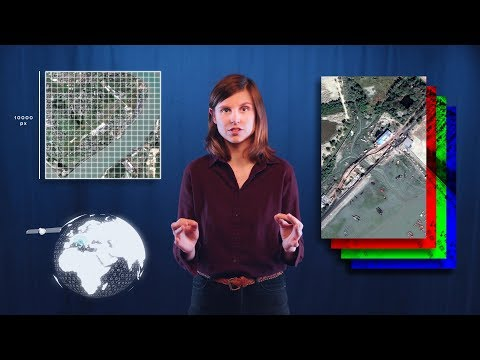

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('CQlLa_UWncg')

Video 2: Semantic segmentation of aerial (satellite) imagery using U-net (by DigitalSreeni)

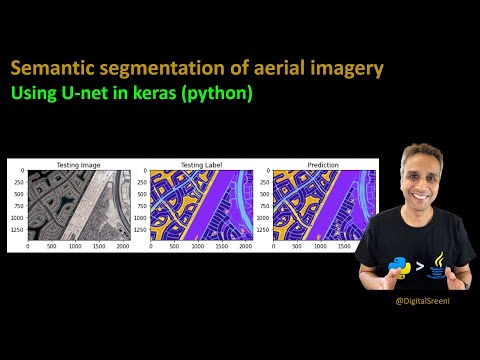

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('jvZm8REF2KY')

Video 3: PyTorch Image Segmentation Tutorial with U-NET: everything from scratch baby (by Aladdin Persson)

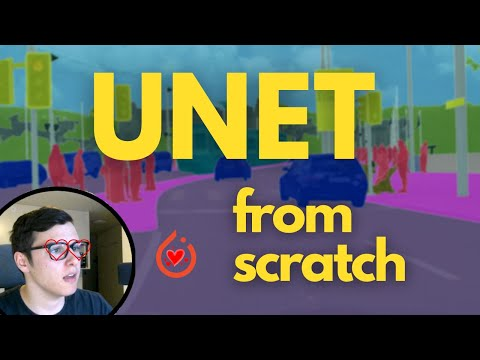

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('IHq1t7NxS8k')

## Reading materials
*Please include additional resources (e.g. research papers, blog posts, textbooks) for the readers to further study the topic of your tutorial.*

### Introductory articles


*   Robin Cole (2022): [A brief introduction to satellite image segmentation with neural networks](https://www.satellite-image-deep-learning.com/p/a-brief-introduction-to-satellite-365).
*   Vooban (2017): [Satellite Image Segmentation: a Workflow with U-Net](https://medium.com/vooban-ai/satellite-image-segmentation-a-workflow-with-u-net-7ff992b2a56e). 
*   Google Research (2019): [Mapping Africa’s Buildings with Satellite Imagery](https://ai.googleblog.com/2021/07/mapping-africas-buildings-with.html).
*   For an example of building segmentation, see Jhansi Anumula (2019): [Semantic Segmentation on Aerial Images using fastai](https://medium.com/swlh/semantic-segmentation-on-aerial-images-using-fastai-a2696e4db127).



### Datasets and tools

A large number of semantic segmentation datasets are available online, varying in spatial resolution, sensor modality and target class (vegetation, roads, building, etc). More recently, efforts have been made to collect relevant data resources in consolidated repositories.


*   Robin Cole's great [collection of resources and data sets](https://github.com/robmarkcole/satellite-image-deep-learning) of deep learning applied to satellite imagery, including [segmentation](https://github.com/robmarkcole/satellite-image-deep-learning#Segmentation)
*   [Awesome Semantic Segmentation](https://github.com/mrgloom/awesome-semantic-segmentation#satellite-images-segmentation)
* For a collection of annotated data sets, see [Awesome_Satellite_Benchmark_Datasets](https://github.com/Seyed-Ali-Ahmadi/Awesome_Satellite_Benchmark_Datasets) repository (search for 'SemSeg')
*   Google's [Open Buildings](https://sites.research.google/open-buildings/) dataset with building footprints in Africa and South East Asia
*   [MMSegmentation](https://github.com/open-mmlab/mmsegmentation) is an open source semantic segmentation toolbox with support for many remote sensing datasets


### Tutorials with code
*   Maurício Cordeiro (2020): [Creating a Very Simple U-Net Model with PyTorch for Semantic Segmentation of Satellite Images](https://medium.com/analytics-vidhya/creating-a-very-simple-u-net-model-with-pytorch-for-semantic-segmentation-of-satellite-images-223aa216e705).
*   Raoof Naushad (2020): [Image Semantic Segmentation of Satellite Imagery using U-Net](https://medium.com/dataseries/image-semantic-segmentation-of-satellite-imagery-using-u-net-e99ae13cf464). 
*   Deep Learning Berlin (2021): [Detecting Buildings in Satellite Images](https://deeplearning.berlin/satellite%20imagery/computer%20vision/fastai/2021/02/17/Building-Detection-SpaceNet7.html).
*   For an example of instance segmentation, see the [Building-Detection-MaskRCNN](https://github.com/Mstfakts/Building-Detection-MaskRCNN#3--from-theory-to-implementation) repository for building detection by using a Mask RCNN model architecture.

# Tutorial: Image Segmentation of Aerial Imagery
### *GRAD-E1394 Deep Learning -- Assignment 3*

Authors:
*   Gabriel da Silva Zech, [g.dasilvazech@students.hertie-school.org](g.dasilvazech@students.hertie-school.org)
*   Julian Kath, [j.kath@students.hertie-school.org](j.kath@students.hertie-school.org)
*   Krishnamoorthy Manohara, [k.manohara@students.hertie-school.org](k.manohara@students.hertie-school.org)
*   Florian Winkler, [f.winkler@students.hertie-school.org](f.winkler@students.hertie-school.org)
*   Nassim Zoueini, [n.zoueini@students.hertie-school.org](n.zoueini@students.hertie-school.org)

This tutorial provides an end-to-end workflow of image segmentation based on aerial images. It introduces a U-net convolutional neural network approach to segmenting buildings from aerial imagery as a specific application of deep learning in a public policy context. Built in a PyTorch environment, the tutorial provides users step-by-step explanations of image segmentation and an example of reproducible, working code in a self-contained notebook. Users will benefit from a structured and practical overview of how to collect and pre-process aerial image data, how to create a custom dataset that annotates aerial images using building footprints, and how to train and fine-tune an image segmentation model on aerial imagery. The tutorial can be extended to further projects that involve a similar approach to aerial or satellite image segmentation, such as segmenting roads or crop fields.

<a name="software-requirements"></a>
# Software Requirements
*Include in this section the software requirements, setup instructions, and library imports. *

This notebook requires Python >= 3.7.9 The following libraries are required:
*   Data manipulation: *pandas*, *numpy*
*   Geospatial data processing libraries: *geopandas*, *rasterio*, *shapely*
*   Deep learning architecture: *PyTorch* 
*   Image processing libraries: *patchify*, *cv2*, *PIL*
*   General helper modules: *urllib*, *xml.etree.ElementTree*, *io*, *zipfile*, *time*, *os*



In [ ]:
# !pip install pandas numpy torch geopandas rasterio shapely patchify cv2 PIL xml.etree.ElementTree zipfile

<a name="Workflow"></a>

# Workflow

The workflow as described below, will be the basis of this tutorial.
We first start by retrieving the data from the mentioned sources, preprocess it in order to make it ready for the model training then finally train the model and extract results.
![Alt text](https://github.com/GabZech/building-segmentation-tutorial/blob/main/img/1_Workflow%20Diagram.jpg?raw=1)


After examining the different parts of the process, let us start by installing the required packages:


In [ ]:
import os

import rasterio
import rasterio.mask
from rasterio.features import rasterize

import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

import numpy as np
import cv2

from patchify import patchify
from PIL import Image
import PIL.ImageOps 

import urllib

import xml.etree.ElementTree as ET
import shapely

from io import BytesIO
from zipfile import ZipFile
import time

import torch
from torch.utils.data import Dataset, DataLoader

rs = 42

<a name="data-description"></a>
# Data Description

*In this section, kindly provide a brief description of the dataset that you will use in this tutorial. Specify information such as the data type or file format (e.g. text, image, video, tabular), size, spatial resolution, temporal resolution, labels or categories, etc. Explicitly name the source of your dataset. If you are introducing a new dataset, feel free to include additional information (e.g. field survey sampling methods, dataset annotation efforts, etc.) or provide external links and resources that discuss the specific details of the dataset.*

The data that we will be using in this tutorial is publicly available on the geoportal of the North-Rhine-Westphalia State of Germany on  https://www.opengeodata.nrw.de</url>. The aerial images were retrieved as individual 10000x10000 pixel tiles from [the geoportal's Digital Orthophotos service](https://www.opengeodata.nrw.de/produkte/geobasis/lusat/dop/dop_jp2_f10/). The building footprints were queried from an attached [geo-webservice](https://www.bezreg-koeln.nrw.de/brk_internet/geobasis/webdienste/index.html) that can be queried by providing the bounding box of the area of interest.

The open data provides aerial imagery of the state with a resolution of 10 centimeters per pixel, that are all geolocated and time-stamped. The building footprints are provided in Geography Markup Language, an XML variant.
A sample of the data will be shown below.

## Data Download
*Provide instructions on how to retrieve the necessary data. This may include bash scripts, Python scripts, or other means of downloading the data.*

The metadata provided by the NRW online portal is accessible through this link https://www.opengeodata.nrw.de/produkte/geobasis/lusat/dop/dop_jp2_f10/dop_meta.zip 
![Alt text](https://github.com/GabZech/building-segmentation-tutorial/blob/main/img/2_Data%20Preparation.jpg?raw=1)


### Step 1: Download tile data paths (aerial images and metadata)

In [ ]:
url_metadata = "https://www.opengeodata.nrw.de/produkte/geobasis/lusat/dop/dop_jp2_f10/dop_meta.zip"
trgt_filename = 'dop_nw.csv'

response = urllib.request.urlopen(url_metadata)
zipfile = ZipFile(BytesIO(response.read()))

metadata = pd.read_csv(zipfile.open(trgt_filename), 
                       sep=';', 
                       skiprows=5) # skip first 5 rows with irrelevant metadata

metadata.head(10)

,Kachelname,Erfassungsmethode,Aktualitaet,Bildflugnummer,Kamera_Sensor,Bodenpixelgroesse,Spektralkanaele,Koordinatenreferenzsystem_Lage,Koordinatenreferenzsystem_Hoehe,Bezugsflaeche,...,Anzahl_Zeilen,Farbtiefe,Standardabweichung,Dateiformat,Hintergrund,Quelldatenqualitaet,Kompression,Komprimierung,Belaubungszustand,Bemerkungen
0,dop10rgbi_32_375_5666_1_nw_2021,0,2021-06-02,1358/21 Leverkusen Wuppertal,DMCIII-27569_DMCIII,10,RGBI,25832,7837,bDOM,...,10000,8,20,JPEG2000,0,1,1,"GDAL_JP2ECW, 90",3,keine
1,dop10rgbi_32_438_5765_1_nw_2022,0,2022-03-10,1377/22 Greven Ibbenbüren,UCEM3-431S91898X119229-f100_UCE-M3,10,RGBI,25832,7837,bDOM,...,10000,8,20,JPEG2000,0,1,1,"GDAL_JP2ECW, 90",1,keine
2,dop10rgbi_32_366_5723_1_nw_2020,0,2020-03-23,1333/20 Wesel Marl,UCEp-1-31011051_UCEp,10,RGBI,25832,7837,bDOM,...,10000,8,20,JPEG2000,0,1,1,"GDAL_JP2ECW, 90",1,keine
3,dop10rgbi_32_344_5645_1_nw_2021,0,2021-03-02,1355/21 Düsseldorf Kerpen,UCEM3-431S71678X_UCE-M3,10,RGBI,25832,7837,bDOM,...,10000,8,20,JPEG2000,0,1,1,"GDAL_JP2ECW, 90",1,keine
4,dop10rgbi_32_407_5744_1_nw_2022,0,2022-03-03,1379/22 Warendorf,DMCIII-27532_DMCIII,10,RGBI,25832,7837,bDOM,...,10000,8,20,JPEG2000,0,1,1,"GDAL_JP2ECW, 90",1,keine
5,dop10rgbi_32_397_5744_1_nw_2022,0,2022-02-27,1378/22 Bocholt Coesfeld,UCEp-1-31011051-f100_UCEp,10,RGBI,25832,7837,bDOM,...,10000,8,20,JPEG2000,0,1,1,"GDAL_JP2ECW, 90",1,keine
6,dop10rgbi_32_313_5624_1_nw_2021,0,2021-03-07,1356/21 Aachen Kronenburg,UCEM3-1-82416042_UCE-M3,10,RGBI,25832,7837,bDOM,...,10000,8,20,JPEG2000,0,1,1,"GDAL_JP2ECW, 90",1,keine
7,dop10rgbi_32_335_5702_1_nw_2020,0,2020-03-24,1334/20 Duisburg Herne,UCEM3-431S51194X_UCE-M3,10,RGBI,25832,7837,bDOM,...,10000,8,20,JPEG2000,0,1,1,"GDAL_JP2ECW, 90",1,keine
8,dop10rgbi_32_388_5791_1_nw_2022,0,2022-02-23,1376/22 Ahaus Rheine,UCEM3-431S41091X314298-f100_UCE-M3,10,RGBI,25832,7837,bDOM,...,10000,8,20,JPEG2000,0,1,1,"GDAL_JP2ECW, 90",1,keine
9,dop10rgbi_32_304_5671_1_nw_2021,0,2021-02-20,1354/21 Mönchengladbach- Würselen,UCEM3-431S72402X_UCE-M3,10,RGBI,25832,7837,bDOM,...,10000,8,20,JPEG2000,0,1,1,"GDAL_JP2ECW, 90",1,keine


### Step 2: Retrieve shapefiles (building footprints)

The next step would be to retrieve the building footprints which will help generating the polygons that delimit the building contours in order to create the masks to be associated to the images at a later stage.

The retrieved tuples related to the building footprints were used to create the bounding boxes used to query the geo webservice. With regards to our tutorial, only the bounding box of the tiles is a changing parameter of the webservice queries, a full documentation can be found [here](https://www.bezreg-koeln.nrw.de/brk_internet/geobasis/webdienste/anleitung_wms.pdf). The response is a GML file, which is in fact an XML file with a specific namespace, containing the building footprints of all buildings within the bounding box, as well as additional metadata. The building footprints then wer converted to shapefile polygons and saved in a geopandas dataframe with the coordinate reference system from the tile. The geopandas dataframe containing the shapefiles of all buildings within the bounding box of the tile then can be passed as input to the mask generation.

To this end, we define the *get_shapefile* function
- **Input**: bounding box values (only north and east, rest is inferred from tile size) as a tuple
- **Output**: geopandas dataframe with polygons of all buildings on the tile

In [ ]:
def get_shapefile(bbox2:tuple, crs='EPSG:25832') -> gpd.GeoDataFrame:
    
    base_url = "https://www.wfs.nrw.de/geobasis/wfs_nw_alkis_vereinfacht?SERVICE=WFS&VERSION=2.0.0&REQUEST=GetFeature&TYPENAMES=ave:GebaeudeBauwerk&BBOX="
    
    x, y = bbox2                                # unpack tuple
    x2 = x + 1000                               # get second lat/lon value for bounding box (always 10000*10000)
    y2 = y + 1000
    
    bbox4 = (x, y, x2, y2)
    
    bbox_str = ','.join(list(map(str, bbox4)))  # create bounding box string for API query
    
    gml_url = ''.join([base_url, bbox_str])
    
    req = urllib.request.Request(gml_url)       # query webservice
    req.get_method = lambda: 'GET'
    response = urllib.request.urlopen(req)
    
    gml_str = response.read()
    
    root = ET.ElementTree(ET.fromstring(gml_str)).getroot() # response is formatted as GML, which can be queried like normal XML, by referencing the relevant namespaces
    
    
    namespace = {'gml': "http://www.opengis.net/gml/3.2",
             'xmlns': "http://repository.gdi-de.org/schemas/adv/produkt/alkis-vereinfacht/2.0",
             'wfs': "http://www.opengis.net/wfs/2.0",
             'xsi': "http://www.w3.org/2001/XMLSchema-instance"
             }
    
    buildings = [i.text for i in root.findall('.//gml:posList', namespace)]
    
    funktions = [i.text for i in root.iter('{http://repository.gdi-de.org/schemas/adv/produkt/alkis-vereinfacht/2.0}funktion')]
    
    ids = [i.items()[0][1] for i in root.findall('.//gml:MultiSurface[@gml:id]', namespace)]
    
    building_shapefiles = []
    
    for id, funktion, build in zip(ids, funktions, buildings):
        coord_iter = iter(build.split(' '))                                                 # coordinates are not in the correct format, therefore need to be rearranged            
        coords = list(map(tuple, zip(coord_iter, coord_iter)))
        
        poly = shapely.geometry.Polygon([[float(p[0]), float(p[1])] for p in coords])       # create shapefile from points
        
        building_shapefiles.append({'id': id, 'funktion':funktion, 'geometry': poly})       # create records of each building on the selected tile
    
    df = pd.DataFrame.from_records(building_shapefiles)
    gdf = gpd.GeoDataFrame(df, crs=crs)                                                     # return geopandas dataframe for input that can be passed to the mask generation 
    
    return gdf

## Data Preprocessing
*Additionally, you can include any data preprocessing steps and exploratory data analyses (e.g. visualize data distributions, impute missing values, etc.) in this section to allow the users to better understand the dataset.*
*In this section, you might also want to describe the different input and output variables, the train/val/test splits, and any data transformations.*

Now, all the data is retrieved and ready to be pre-processed for image segmentation and the specific requirements of the U-Net model.

This stage essentially consists of creating the image-mask pairs that will train the model. For this step, we used [code by Lucas Pedrosa Soares](https://lpsmlgeo.github.io/2019-09-22-binary_mask/). 

As a first step, the building footprint shapefiles in the geopandas dataframe were concatenated and merged into one single polygon (this is because we are implementing semantic segmentation and are not interested in an instance segmentation task). This polygon is then used to create a mask for the corresponding image tile.

Next, the images and masks will be divided into several patches (the size of these patches corresponds to the input size of the U-Net model). We implemented this step once yielding a saved png and once a tensor. The function can be used for both images and masks.
![Alt text](https://github.com/GabZech/building-segmentation-tutorial/blob/main/img/3_Preprocessing_block.jpg?raw=1)


In [ ]:
# Insert data pre-processing and exploratory data analysis
# code here. Feel free to break this up into several code
# cells, interleaved with explanatory text. 

### Step 3: Combine shapefile to polygon 

As a small helper function we used *poly_from_utm* which aligns all polygons to the image **coordinate reference system (crs)**. This is not strictly neccessary, as shapefiles and images should all use the same crs (EPSG:25832) but was included as an additional step to ensure compatibility in case this may change, since the crs of the shapefile is hardcoded in the the retrieval function.
- **Input**: polygon and image crs
- **Output**: transformed polygon, aligned with the crs of the image

In [ ]:
def poly_from_utm(polygon, transform):
    poly_pts = []
    
    poly = shapely.ops.unary_union(polygon)
    for i in np.array(poly.exterior.coords):
        
        # Convert polygons to the image CRS
        poly_pts.append(~transform * tuple(i))
        
    # Generate a polygon object
    new_poly = Polygon(poly_pts)
    return new_poly


### Step 4: Generate Masks

Masks are generated using the function *generate_masks* described as follows:

First, the image url (constructed from the Kachelname column in the dataframe in cell 9.1.1 and a base url) is used to download the image. The image is opened with **rasterio**, extracting the crs information from the image's metadata. Finally, all polygons from the geopandas dataframe containing all the shapefiles, are combined and individually aligned to the crs of the image.

- **Input**: geopandas dataframe and tile-image path
- **Output**: mask and image in 1000-1000 pixels


In [ ]:

def generate_mask(shapefiles, img_url):
    
    with rasterio.open(img_url, "r") as src:
        raster_img = src.read()
        raster_meta = src.meta
    
    # Generate binary mask
    polygons = []
    im_size = (raster_meta["height"], raster_meta["width"])
    for _, row in shapefiles.iterrows():
        if row['geometry'].geom_type == 'Polygon':
            poly = poly_from_utm(row['geometry'], raster_meta["transform"])
            polygons.append(poly)
        else:
            for p in row['geometry']:
                poly = poly_from_utm(p, raster_meta["transform"])
                polygons.append(poly)

    mask = rasterize(shapes=polygons, out_shape=im_size)
    
    return mask, raster_img

### Step 5: Patchify and save images and masks

In order to divide the images and masks into the patches, we define the *load_and_patchify* function described with the below:

The requires the specification of the number of channels, as this impacts the patchification step. This lets us use the function for both masks and images. As a first step, the image is cropped to a size divisable by the patch size (which corresponds to the model input). Then, the image is divided into patches and saved as a png into the output folder. We later implemented a similar function which does not save the patches as png-images but saves them as tensors, as this was more compatible with the chosen modelling approach.

- **Input**: mask OR image, patch_size (**should correspond to input size for model**), path to output folder (e.g. masks or images), a string identifying each individual 1000-1000 tile (needs to be unique, otherwise output will be overwritten), number of channels (for masks: None, for images: 4)
- **Output**: saves individual images as png files into the specified output folder

In [ ]:
def load_and_patchify(img, patch_size, output_path, tile_identifier, num_channels=None):
    
    if num_channels:                                                            # this handles pictures
        size_x = (img.shape[1]//patch_size) * patch_size
        size_y = (img.shape[2]//patch_size) * patch_size
        
        img = img[:, :size_x, :size_y]                                          # subsets image (input size is not neccessarily divisible by patch size)
        
        patch_img = patchify(img, (num_channels, patch_size, patch_size), step=patch_size)
        patch_img = np.squeeze(patch_img)
        
    else:                                                                       # this handles masks
        size_x = (img.shape[0]//patch_size) * patch_size
        size_y = (img.shape[1]//patch_size) * patch_size
    
        img = img[:size_x, :size_y] * 255                                       # mask needs to be multiplied by 255, as it is on a 0-1 scale
        
        patch_img = patchify(img, (patch_size, patch_size), step=patch_size) 
    
    for i in range(patch_img.shape[0]):                                             # this could also be left out, we could just return numpy arrays and pass them to the model.
        for k in range(patch_img.shape[1]):
            single_patch_img = patch_img[i, k]                                  # iterates through all patches
            
            path_string = str(tile_identifier) + '_' + str(i) + '_' + str(k) + '.png'
            
            file_path = os.path.join(output_path, path_string)
                
            if num_channels:
                single_patch_img = single_patch_img.swapaxes(0,2)
            
            os.makedirs(os.path.dirname(file_path), exist_ok = True)
            #print(file_path)
            #print(single_patch_img)
            #break
            cv2.imwrite(file_path, single_patch_img)                            # writes the image to this pass

#### **Let us recap...**

In the following, we will showcase an example where we apply the three functions: *get_shapefile*, *generate_mask* and *load_and_patchify* in order to show how an image-mask pair is created.

At a later stage, we will save all created patches from one image as a tensor, and then create a tensor that has all the tensors of patches for all the tiles.

##### NEXT LINES TO BE DELETED

#1. *get_shapefile*:
- **Input**: bounding box values (only north and east, rest is inferred from tile size) as a tuple
- **Output**: geopandas dataframe with polygons of all buildings on the tile

2. *generate_mask*:
- **Input**: geopandas dataframe and tile-image path
- **Output**: mask and image in 1000-1000 pixels

3. *load_and_patchify*:
- **Input**: mask OR image, patch_size (**should correspond to input size for model**), path to output folder (e.g. masks or images), a string identifying each individual 1000-1000 tile (needs to be unique, otherwise output will be overwritten), number of channels (for masks: None, for images: 4)
- **Output**: saves individual images as png files into the specified output folder

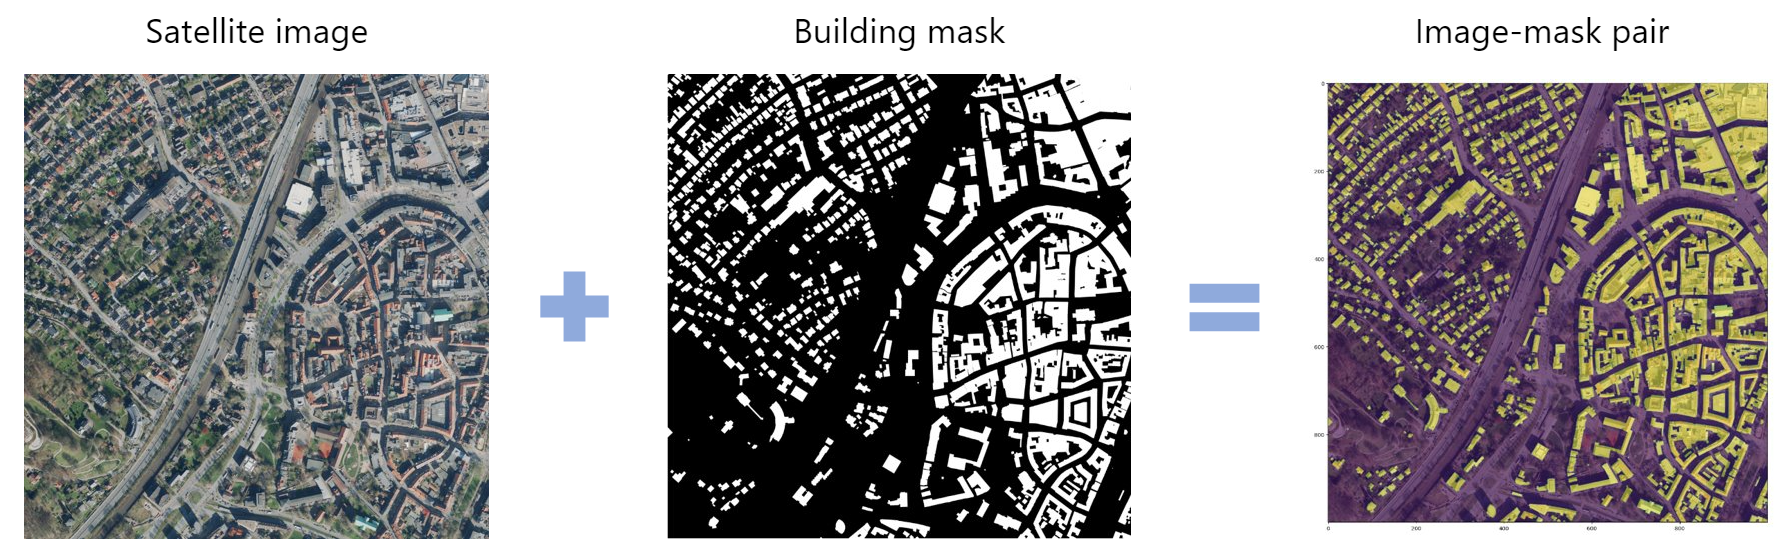

#### **Example: Image-mask pair creation walkthrough**

In [ ]:
# Download metadata (cell 2)

# index data from metadata dataframe to get coordinates and image link
random_index = np.random.choice(metadata.index.values, 1)

lat = metadata.loc[random_index[0], 'Koordinatenursprung_East']
long = metadata.loc[random_index[0], 'Koordinatenursprung_North']
coords = (lat, long)


base_url = "https://www.opengeodata.nrw.de/produkte/geobasis/lusat/dop/dop_jp2_f10/"
img_path = metadata.loc[random_index[0], 'Kachelname']

# create image url from base url, image url and file extension
img_url = base_url + img_path + '.jp2'

In [ ]:
shp_data = get_shapefile(coords)

mask, image = generate_mask(shp_data, img_url)

patch_size = 256

base_path_krishna = r"C:\Users\krish\building-segmentation-tutorial"

#load_and_patchify(image, patch_size, '../output/patchified_imgs/', random_index[0], 4)
load_and_patchify(image, patch_size, base_path_krishna + '\\output\\patchified_imgs\\', random_index[0], 4)

#load_and_patchify(mask, patch_size, '../output/patchified_masks/', random_index[0])
load_and_patchify(mask, patch_size, base_path_krishna + '\\output\\patchified_masks\\', random_index[0])

##### And now we define our function to save the generated patches as a tensor

In [ ]:
def load_and_patchify_tensor(img, patch_size, tile_identifier, num_channels=None):
    
    if num_channels:
        size_x = (img.shape[1]//patch_size) * patch_size
        size_y = (img.shape[2]//patch_size) * patch_size
        
        img = img[:, :size_x, :size_y]
        
        patch_img = patchify(img, (num_channels, patch_size, patch_size), step=patch_size)
        patch_img = np.squeeze(patch_img)
        
    else:
        size_x = (img.shape[0]//patch_size) * patch_size
        size_y = (img.shape[1]//patch_size) * patch_size
    
        img = img[:size_x, :size_y] * 255
        
        patch_img = patchify(img, (patch_size, patch_size), step=patch_size) 
    
    for i in range(patch_img.shape[0]):
        for k in range(patch_img.shape[1]):
            single_patch_img = patch_img[i, k]
            if num_channels:
                single_patch_img = single_patch_img.swapaxes(0,2)
            
            yield torch.Tensor(single_patch_img)

##### Finally, we generate the patches for tiles in bulk and saves them as a single tensor

In [ ]:
Y = [(0,0)]
Msks = []
Imgs = []
for y in range(20):    
    
    
    coords = (0,0)
    while coords in Y:
        random_index = np.random.choice(metadata.index.values, 1)
        lat = metadata.loc[random_index[0], 'Koordinatenursprung_East']
        long = metadata.loc[random_index[0], 'Koordinatenursprung_North']
        coords = (lat, long)

    try:
        base_url = "https://www.opengeodata.nrw.de/produkte/geobasis/lusat/dop/dop_jp2_f10/"
        img_path = metadata.loc[random_index[0], 'Kachelname']

        # create image url from base url, image url and file extension
        img_url = base_url + img_path + '.jp2'

        shp_data = get_shapefile(coords)

        mask, image = generate_mask(shp_data, img_url)

        patch_size = 256

        base_path_krishna = r"C:\Users\krish\building-segmentation-tutorial"


        imgs = [i for i in load_and_patchify_tensor(image, patch_size, random_index[0], 4)]
        msks = [i for i in load_and_patchify_tensor(mask, patch_size, random_index[0])]

        msk = 0
        while msk < len(msks):
            if torch.count_nonzero(msks[msk]).item() == 0:
                rem = np.random.choice(range(100))
                if rem > 20:
                    del msks[msk]
                    del imgs[msk]
                    continue
            msk += 1
            
        if y == 0:
            Msks = torch.stack(msks)
            Imgs = torch.stack(imgs)
        else:
            Msks = torch.cat((Msks, torch.stack(msks)), 0)
            Imgs = torch.cat((Imgs, torch.stack(imgs)), 0)
        #Msks.extend(msks)
        #Imgs.extend(imgs)
        print(coords)
        print(str(y) + "/100")
    except:
        continue

                
    


In [ ]:
torch.save(Imgs, r"C:\Users\krish\building-segmentation-tutorial\output\tensors\Imgs.pt")
torch.save(Msks, r"C:\Users\krish\building-segmentation-tutorial\output\tensors\Msks.pt")

### Step 6: Removing patches with no visible buildings

As a last step before our data is ready to be plugged into the U-Net CNN, we will be removing the patches that do not have visible buildings and keep the relevant ones only.

We start with loading the patches and mask tensors and displaying them as images ...

In [ ]:
Imgs = torch.load(r"C:\Users\krish\building-segmentation-tutorial\output\tensors\Imgs.pt")
Msks = torch.load(r"C:\Users\krish\building-segmentation-tutorial\output\tensors\Msks.pt")

In [ ]:
Imgs.shape

torch.Size([500, 256, 256, 4])

In [ ]:
Msks.shape

torch.Size([500, 256, 256])

##### So, removing patches with no visible buildings...

In [ ]:
nonEmptyIndices = torch.unique(Msks.nonzero(as_tuple=True)[0])

In [ ]:
Msks = Msks[nonEmptyIndices]

##### then finally, reducing the size of the dataset to 500 to reduce computational load...

In [ ]:
Msks = Msks[:500]

In [ ]:
Imgs = Imgs[nonEmptyIndices]

In [ ]:
Imgs = Imgs[:500]

In [ ]:
Imgs[5].shape

torch.Size([256, 256, 4])

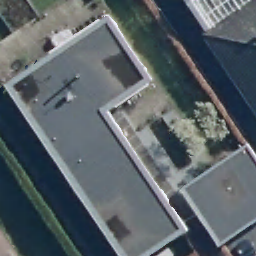

In [ ]:
nparr = Imgs[2].detach().cpu().numpy()[:,:,:-1]
Image.fromarray(nparr.astype(np.uint8), 'RGB')


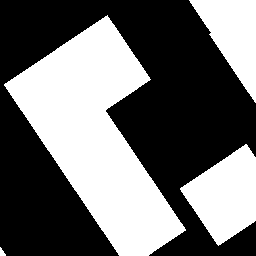

In [ ]:
nparr = Msks[2].detach().cpu().numpy().transpose()
Image.fromarray(nparr.astype(np.uint8), 'L')

### Step 7:  Create train, validation and test datasets

In order to meet computational restrictions, we have limited the training, validation and test datasets as follows:
400 samples for training, 80 for validation and 20 for testing

To this end, we create a new class *patchDataset* to retrieve the image-mask pairs in question. 

In [ ]:
class patchDataset(Dataset):
    def __init__(self, X, Y):
        super().__init__()
        self.Imgs = X
        self.Msks = Y
        
    def __getitem__(self, idx):
        
        x = self.Imgs[idx].detach().cpu().numpy().transpose((2,0,1))
        x = torch.tensor(x, dtype=torch.float32)
        
        y = Msks[idx].detach().cpu().numpy().transpose()
        y = torch.tensor(y, dtype=torch.float32)
        y = y.type(torch.LongTensor)
        
        return x,y
    
    def getimg(self, idx, mask=False):
        if mask:
            msk = self.Msks[idx].detach().cpu().numpy().transpose()
            m = Image.fromarray(msk.astype(np.uint8), 'L')
            return m
        else:
            img = self.Imgs[idx].detach().cpu().numpy()[:,:,:-1]
            z = Image.fromarray(img.astype(np.uint8), 'RGB')
            return z
    def __len__(self):
        return len(self.Imgs)

In [ ]:
dataset = patchDataset(Imgs, Msks)

In [ ]:
len(dataset)

500

In [ ]:
x,y = dataset[55]
x.shape

torch.Size([4, 256, 256])

In [ ]:
y.shape

torch.Size([256, 256])

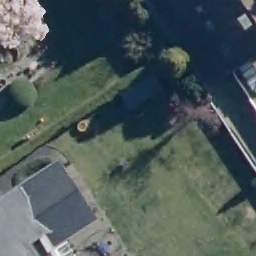

In [ ]:
dataset.getimg(55)

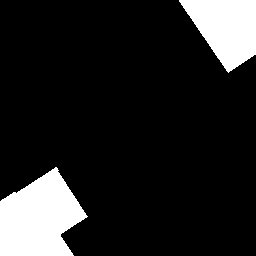

In [ ]:
dataset.getimg(55, mask=True)

In [ ]:
train_ds, val_ds, test_ds = torch.utils.data.random_split(dataset, (400, 80, 20))
train_dl = DataLoader(train_ds, batch_size=5, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=5, shuffle=True)

In [ ]:
xb, yb = next(iter(train_dl))
xb.shape, yb.shape

(torch.Size([5, 4, 256, 256]), torch.Size([5, 256, 256]))

<a name="modeltraintest"></a>
# Model Training and Testing



![Alt text](https://github.com/GabZech/building-segmentation-tutorial/blob/main/img/4_CNN.jpg?raw=1)


#### Defining the U-Net model

Below we define the basic building blocks of the UNet model separately in order to explain the architecture of the model.
The functions under *Option A* are not used to apply the model, however the same code is used in the UNet Class to define the layers.
Our tutorial applies directly the full model as it is described under *Option B* which is a simplified version of The UNet neural network.

#### U-Net Model Architecture

![Alt text](https://github.com/GabZech/building-segmentation-tutorial/blob/main/img/Unet.PNG?raw=1)



As shown in the figure above, the UNet model has two main parts: an encoder and a decoder, alternatively called contract and expand block.

In the contract block as series of convolutions and activations followed by a maxpooling are applied to extract the features of the images and detect buildings edges. This results in a size and resolution reductions of the treated images which does not serve the purpose of segmentation as the output must be an image of a similar resolution to input images. And here is where the expand block comes in handy.

In the expand block a series of upconvolutions are applied and concatenated with the outputs of the several layers of the contract block in order to maintain the resolution obtained at the output of every feature extraction level.

#### Option A: Defining the blocks of the U-Net model separately

The Contract block

In [ ]:
def contract_block(in_channels, out_channels, kernel_size, padding):

    contract = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=1, padding=padding),
        torch.nn.BatchNorm2d(out_channels),
        torch.nn.ReLU(),
        torch.nn.Conv2d(out_channels, out_channels, kernel_size=kernel_size, stride=1, padding=padding),
        torch.nn.BatchNorm2d(out_channels),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
                             )

    return contract

In [ ]:
block1 = contract_block(4,32,3,1)

In [ ]:
c1 = block1(xb)

In [ ]:
c1.shape

torch.Size([5, 32, 128, 128])

The expand block

In [ ]:
def expand_block(in_channels, out_channels, kernel_size, padding):

    expand = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=padding),
        torch.nn.BatchNorm2d(out_channels),
        torch.nn.ReLU(),
        torch.nn.Conv2d(out_channels, out_channels, kernel_size, stride=1, padding=padding),
        torch.nn.BatchNorm2d(out_channels),
        torch.nn.ReLU(),
        torch.nn.ConvTranspose2d(out_channels, out_channels, kernel_size=3, stride=2, padding=1, output_padding=1) 
                            )
    return expand

In [ ]:
block2 = expand_block(32,3,3,1)

In [ ]:
c2 = block2(c1)
c2.shape

torch.Size([5, 3, 256, 256])

#### Option B (Step 7): Full simplified UNet model

The model that our tutorial will be based on, is a simplified version of the full UNet model described in the previous section, where it uses one layer less in both the encoder and decoder in order to reduce computational power.

This simplified model is an adaptation from  https://medium.com/analytics-vidhya/creating-a-very-simple-u-net-model-with-pytorch-for-semantic-segmentation-of-satellite-images-223aa216e705 

In [ ]:
class UNET(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.conv1 = self.contract_block(in_channels, 32, 7, 3)
        self.conv2 = self.contract_block(32, 64, 3, 1)
        self.conv3 = self.contract_block(64, 128, 3, 1)

        self.upconv3 = self.expand_block(128, 64, 3, 1)
        self.upconv2 = self.expand_block(128, 32, 3, 1)
        self.upconv1 = self.expand_block(64, out_channels, 3, 1)

    def __call__(self, x):

        # downsampling part
        conv1 = self.conv1(x)

        conv2 = self.conv2(conv1)

        conv3 = self.conv3(conv2)


        upconv3 = self.upconv3(conv3)


        upconv2 = self.upconv2(torch.cat([upconv3, conv2], 1))

        upconv1 = self.upconv1(torch.cat([upconv2, conv1], 1))

        
        output = torch.squeeze(upconv1, 1).to(torch.float32)

        return output

    def contract_block(self, in_channels, out_channels, kernel_size, padding):

        contract = nn.Sequential(
            torch.nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=1, padding=padding),
            torch.nn.BatchNorm2d(out_channels),
            torch.nn.ReLU(),
            torch.nn.Conv2d(out_channels, out_channels, kernel_size=kernel_size, stride=1, padding=padding),
            torch.nn.BatchNorm2d(out_channels),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
                                 )
        return contract

    def expand_block(self, in_channels, out_channels, kernel_size, padding):

        expand = nn.Sequential(torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=padding),
                            torch.nn.BatchNorm2d(out_channels),
                            torch.nn.ReLU(),
                            torch.nn.Conv2d(out_channels, out_channels, kernel_size, stride=1, padding=padding),
                            torch.nn.BatchNorm2d(out_channels),
                            torch.nn.ReLU(),
                            torch.nn.ConvTranspose2d(out_channels, out_channels, kernel_size=3, stride=2, padding=1, output_padding=1) 
                            )
        return expand

### Step 8: Training the U-Net model

In the training loop below, the data is passed to the defined UNet simplified model alongside the loss function and the optimizer.

Our model will use a cross entropy loss function which is commonly used for segmentation algorithms, as well as an Adam optimizer to update the weights of the UNet CNN.

As the task is computationally heavy, we limited the number of epochs to 10.

In [ ]:
def train(model, train_dl, valid_dl, loss_fn, optimizer, acc_fn, epochs=10):
    start = time.time()
    train_loss, valid_loss = [], []
    best_acc = 0.0
    for epoch in range(epochs):
        print('Epoch {}/{}'.format(epoch, epochs - 1))
        print('-' * 10)

        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train(True)  
                dataloader = train_dl
            else:
                model.train(False)  
                dataloader = valid_dl

            running_loss = 0.0
            running_acc = 0.0
            step = 0
            for x, y in dataloader:
                step += 1
                # forward pass
                if phase == 'train':
                    optimizer.zero_grad()
                    outputs = model(x)
                    outputs = outputs.to(torch.float32)
                    y = y.to(torch.float32)
                    loss = loss_fn(outputs, y)

                    loss.backward()
                    optimizer.step()

                else:
                    with torch.no_grad():
                        outputs = model(x)
                        outputs = outputs.to(torch.float32)
                        y = y.to(torch.float32)
                        loss = loss_fn(outputs, y)

                # stats - whatever is the phase
                acc = acc_fn(outputs, y)

                running_acc  += acc*dataloader.batch_size
                running_loss += loss*dataloader.batch_size 

                if step % 10 == 0:
                    print('Current step: {}  Loss: {}  Acc: {}'.format(step, loss, acc))

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_acc / len(dataloader.dataset)

            print('{} Loss: {:.4f} Acc: {}'.format(phase, epoch_loss, epoch_acc))

            train_loss.append(epoch_loss) if phase=='train' else valid_loss.append(epoch_loss)

    time_elapsed = time.time() - start
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))    
    
    return train_loss, valid_loss    

def acc_metric(predb, yb):
    return (predb.argmax(dim=0) == yb).float().mean()            

In [ ]:
unet = UNET(4,1)

### Step 9: Testing the U-Net model using loss function

In [ ]:
loss_fn = nn.CrossEntropyLoss()
#loss_fn = nn.BCELoss()
opt = torch.optim.Adam(unet.parameters(), lr=0.01)

In [ ]:
train_loss, valid_loss = train(unet, train_dl, val_dl, loss_fn, opt, acc_metric, epochs=10)

Epoch 0/9
----------
Current step: 10  Loss: 84537.5625  Acc: 0.282888799905777
Current step: 20  Loss: 104292.8515625  Acc: 0.37369078397750854
Current step: 30  Loss: 30169.71484375  Acc: 0.66461181640625
Current step: 40  Loss: 55332.2734375  Acc: 0.2265472412109375
Current step: 50  Loss: 89537.1328125  Acc: 0.1155853271484375
Current step: 60  Loss: 107577.734375  Acc: 0.0713958740234375
Current step: 70  Loss: 68230.6953125  Acc: 0.7231658697128296
Current step: 80  Loss: 93159.3984375  Acc: 0.21868285536766052
train Loss: 65945.2734 Acc: 0.3234497308731079
Current step: 10  Loss: 75424.015625  Acc: 0.20256957411766052
valid Loss: 62630.3438 Acc: 0.2418949156999588
Epoch 1/9
----------
Current step: 10  Loss: 88116.046875  Acc: 0.005383300594985485
Current step: 20  Loss: 49402.8984375  Acc: 0.39223939180374146
Current step: 30  Loss: 84934.234375  Acc: 0.25004273653030396
Current step: 40  Loss: 20790.810546875  Acc: 0.005871581844985485
Current step: 50  Loss: 24399.26171875  A

### Step 10: Running the model to generate a sample prediction

Running the model to generate a prediction and compare it to the target

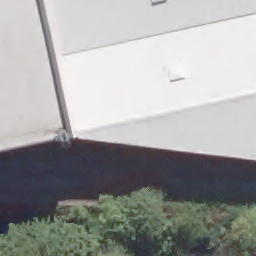

In [ ]:
x = xb[2,:,:]
x = x.detach().cpu().numpy().transpose((1,2,0))
img = x[:,:,:-1]
z = Image.fromarray(img.astype(np.uint8), 'RGB')
z

In [ ]:
with torch.no_grad():
    predb = unet(xb)

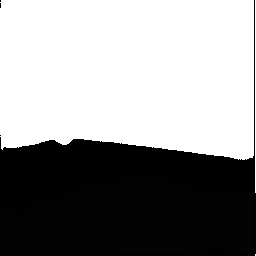

In [ ]:
p = predb[2,:,:]
mskp = p.detach().cpu().numpy()
mp = PIL.ImageOps.invert(Image.fromarray(mskp.astype(np.uint8), 'L'))
mp

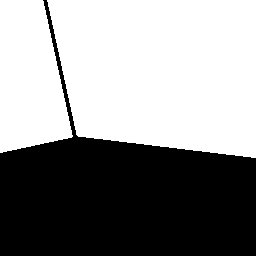

In [ ]:
y = yb[2,:,:]
msk = y.detach().cpu().numpy()
m = Image.fromarray(msk.astype(np.uint8), 'L')
m

<a name="results-and-discussion"></a>
# Results & Discussion

As mentioned, for each epoch, our model's error rate was calculated using Cross Entropy loss, which is a very common loss function for classification and image recognition. For validation of our model, however, a different metric was used. The score was calculated to be equal to, for each batch, the number of pixels whose labels matched between the target and the predicted masks divided by the total number of pixels. 

The results, while not flawless, are encouraging. Visualizing the masks allows us to see that the model is already picking up on significant patterns and is already very close to the ground truth in several cases. Increasing the number of epochs and training samples is noticeably improving this, implying that if we were to commit enough computational and time resources into it, its performance would be substantially higher.

## Limitations
Our tutorial is focused on education and learning, hoping to generate interest in the use of satellite and aerial image segmentation in policy contexts. Balancing explainability of our methodology and model optimization, we have made deliberate simplifications in our approach that compromise model performance. 

**Reducing the size of our data set:** We have trained our model using a limited number of samples due to constraints in time and computational capacity. We have used 400 data points in our training dataset, 80 in the validation dataset and 20 in the test dataset, which are generally lower than in similar real-world applications. Our main goal was to showcase a proof of concept that can potentially be scaled in the future. Therefore, we chose a sufficiently small dataset to keep the required computational time low. It is noted that, given the current performance of our model, it should not be used to conduct meaningful analyses. 

**Reducing the number of epochs:** For the same reasons of computational capacities, we have limited the number of epochs, i.e. the number of passes of the entire training dataset during the learning process, to nine epochs. As with a bigger data set, we would expect performance of our segmentation model to grow substantially if users increase the number of epochs in future applications. 

**Removing aerial images without buildings:** Our original dataset of aerial images from North Rhine-Westphalia contains a large number of images which do not have visible buildings in them, for example of forested areas. Including them would lead to a class imbalanced dataset which is a frequent problem when training deep neural networks and ultimately decreases performance. To avoid imbalance, we removed image-mask patches with no visible buildings from our dataset before training our segmentation algorithm. 

**Incomplete building footprint data:** There are buildings which show up on the raw aerial images but are not present in the footprint dataset. This can happen with smaller constructions like sheds or bicycle lockers in backyards, but it might also happen with larger buildings due to illegal or non-registered constructions. This potentially increases the error rate if the goal is to segment all kinds of buildings with the model. 

**Single-class segmentation:** The deep learning algorithm we use is a single-class detector, i.e. it is only capable of identifying if, and where, a building exists in an image or not (building vs. no building). In real-world applications, however, it might be of more relevance to identify specific types of buildings (e.g. residential vs. commercial buildings) or certain roof characteristics and structures. To accommodate these extensions, the segmentation algorithm would have to be adapted to instance and panoptic segmentation tasks.

## Data accessibility and availability 

**Generalizability of model trained on German data:** A potential use of this model is to identify patterns in urban development in regions where footprint data is non-existent, uncommon or not openly accessible. However, since the algorithm is trained using German data only, it might not be transferable to other regions, for example those with informal settlements and sheds that are not common in Germany. Right now, the data set we use is biased toward building types that exist in Germany but excludes architectural features common in other parts of the world. For future applications, we would recommend training a model using much more diverse data from different regions of the world to account for these architectural variations. 

**Availability of high-resolution aerial imagery:** This model was trained using high-resolution images (10 cm per pixel). At the time of writing, it is rather uncommon to find images at such resolution that are openly available. To the best of our knowledge, even within Germany, North Rhine-Westphalia is the only state that publishes data at such resolutions. It is therefore unclear how the model would perform in other regions where only lower image resolutions are available. That performance should be carefully measured and tested before making assumptions about the urbanization of a region through the use of this methodology. 

**Accessibility of aerial imagery:** It is more likely than not that regions exist where aerial imagery is not publicly available at all or highly restricted. At the same time, it is those regions that could be of particular interest for analyzing patterns of urban development, energy potential and other use cases. Our methodology would, however, be of little use there and could even reinforce a sense of neglect by local communities if such a model was used at scale in other regions. A potential remedy would be private data providers that sell aerial and satellite imagery against a fee; however, this may incur additional costs on such local communities.  

## Next Steps
Our tutorial provides space for exploration and different applications of image segmentation once users work through the steps of our image segmentation workflow. However, we want to close our tutorial with a few **recommendations and best practices** if you choose to use our data, methodology or workflow. 

*   If you want to conduct similar analyses in comparable regions, train the model using a much bigger sample and higher epoch numbers, while remaining conscious of computational capacities. 

*   If you wish to conduct analyses outside of (northwest) Germany, try to find aerial imagery and building footprint data for your own region and train the algorithm using those, if possible. 

*   If you choose to adopt the U-Net model architecture we used, try increasing the model input shape and adding more convolutions in both encoder and decoder layers. The training data used for the model has an uncommonly high resolution which in turn might require more convolutions for the filter masks to learn high-level representations of the building footprints. 

*   The data preparation pipeline will work with other data from the GEOportal.NRW. Using other or additional data could be promising to tackle related tasks, for instance ground sealing estimation. 

Beyond minor extensions to our approach, we hope our tutorial in general grew interest in the **wider adoption of image segmentation in areas of public policy and government**. In addition to applications in smart cities, disaster response or energy forecasting, our image segmentation model could, for example, be used to detect illegal or unregistered settlements which are currently not registered in building footprint datasets. Similarly, matching the results of our model to footprint data could help spot buildings with overly large roof sizes or unauthorized constructions sites, increasing overall public safety and accountability.

Applications for image segmentation are manifold.
Use cases are growing in numbers and impact, while data are increasingly available at decreasing cost. Conditions are ripe for governments and policy-makers to add segmentation of satellite and aerial imagery to their toolset. We hope our tutorial can make an interesting and useful contribution to improving public services through the use of deep learning technologies. We look forward to any applications that build on our work.

<a name="references"></a>
# References

*   Maurício Cordeiro (2020): [Creating a Very Simple U-Net Model with PyTorch for Semantic Segmentation of Satellite Images](https://medium.com/analytics-vidhya/creating-a-very-simple-u-net-model-with-pytorch-for-semantic-segmentation-of-satellite-images-223aa216e705).
*   Robin Cole (2022): [A brief introduction to satellite image segmentation with neural networks](https://www.satellite-image-deep-learning.com/p/a-brief-introduction-to-satellite-365).
*   Lucas Pedrosa Soares (2019): [Converting Shapefiles into a Binary Raster](https://lpsmlgeo.github.io/2019-09-22-binary_mask/).






## Acknowledgement